<a href="https://colab.research.google.com/github/TeddyProg/ML_workbooks/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libs, mounting drive

In [1]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


Loading data

In [18]:

data2023 = pd.read_csv('/content/drive/MyDrive/ZNO_data/Odata2023File.csv', on_bad_lines='warn', engine = 'c', header = 0, sep=';')


Formatting dataframe

In [19]:
subjectGradesColumnNames = [ 'UkrBlockBall100',
                             'HistBlockBall100',
                             'MathBlockBall100',
                             'PhysBlockBall100',
                             'ChemBlockBall100',
                             'BioBlockBall100',
                             'EngBlockBall100',
                             'FraBlockBall100',
                             'DeuBlockBall100',
                             'SpaBlockBall100'
                             ]

for subjectGrade in subjectGradesColumnNames:

  if data2023[subjectGrade].dtype != np.float64:
    data2023[subjectGrade] = data2023[subjectGrade].str.replace(',','.')
    data2023[subjectGrade] = data2023[subjectGrade].astype(np.float64)

numSubjects = len(subjectGradesColumnNames)

Displaying different subjects histograms

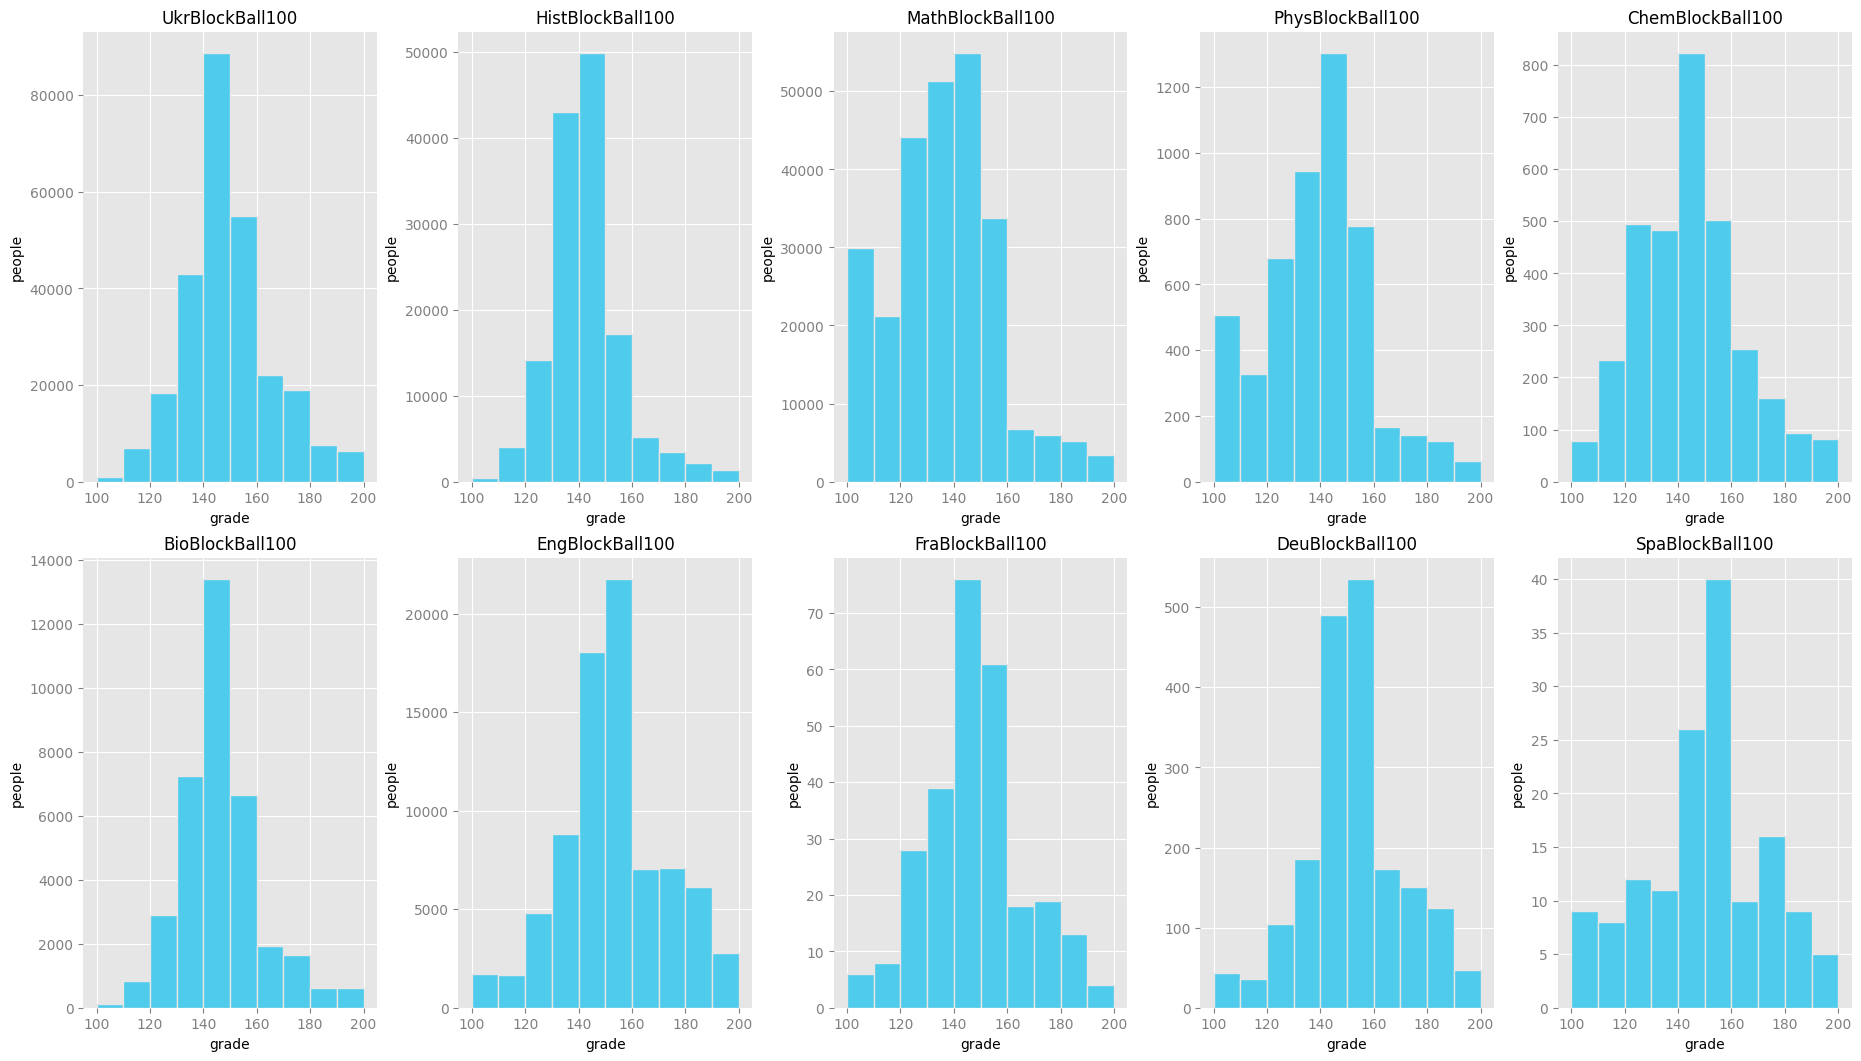

In [51]:
def setup_histogram_style(ax):
  ax.set_facecolor('#E6E6E6')
  ax.set_axisbelow(True)
  # draw solid white grid lines
  ax.grid(color='w', linestyle='solid')
  # hide axis spines
  for spine in ax.spines.values():
    spine.set_visible(False)
  # hide top and right ticks
  ax.xaxis.tick_bottom()
  ax.yaxis.tick_left()
  # lighten ticks and labels
  ax.tick_params(colors='gray', direction='out')
  for tick in ax.get_xticklabels():
    tick.set_color('gray')
  for tick in ax.get_yticklabels():
    tick.set_color('gray')

def getGradeArrays(data, gradeArrayNames):
  gradeArrays = []
  for subjName in gradeArrayNames:
    neededData = data[subjName].dropna()
    neededData = neededData[neededData >= 100] #filtering out probably wrong data or result from someone who didn`t attend the test (?)
    if neededData.shape[0] > 0:
      gradeArrays.append(neededData)

  return gradeArrays

def getHistograms(gradeArrays):
  minGrade = 100
  maxGrade = 200
  numBins = 10
  step = (maxGrade - minGrade) / numBins
  bins = np.arange(minGrade, maxGrade + step, step)
  gradeHists = []

  for i in range(0, len(gradeArrays)):
    hist, _ = np.histogram(gradeArrays[i], bins)
    gradeHists.append(hist)

  return gradeHists, bins

gradeArrays = getGradeArrays(data2023, subjectGradesColumnNames)
gradeHists, bins = getHistograms(gradeArrays)

numHists = len(gradeHists)
numPlotRows = 2
numPlotCols = (len(gradeHists) + numPlotRows - 1) // numPlotRows # ceiling column num

fig, axs = plt.subplots(nrows = numPlotRows, ncols = numPlotCols, constrained_layout=True)
fig.set_size_inches(18.5, 10.5)
for i in range(0, numHists):
  r = i // numPlotCols
  c = i % numPlotCols

  ax = axs[r, c]
  setup_histogram_style(ax)
  ax.bar(bins[:-1], gradeHists[i], width=np.diff(bins), align="edge", edgecolor='#E6E6E6', color='#4FCBEC')
  ax.set_title(subjectGradesColumnNames[i])
  ax.set_ylabel('people')
  ax.set_xlabel('grade')